In [2]:
#!pip install numpy
%load_ext autoreload
%autoreload 2
#!pip install /Users/Shared/koret_software/VPixx/VPixx\ Technologies/Software\ Tools/pypixxlib/pypixxlib-1.10.3.tar.gz
#import pgl
from pgl import pgl as pglLibrary
from pgl import screen as pglScreen
from pgl import task as pglTask
from pgl import pglProPixx
from pgl import pglDataPixx
from pgl import pglTrackPixx3
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt
pgl = pglLibrary()
print(sys.version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 15.6
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 3 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display)
(pgl:checkOS)   LED Cinema Display: 1920 x 1200 (WUXGA - Widescreen Ultra eXtended Graphics Array) (Unknown type)
(pglBase) Verbosity level set to 1
(pglBase) Main library instance created
3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 08:03:38) [Clang 14.0.6 ]


In [13]:
import pylink
eyelink = pylink.EyeLink("100.1.1.2")


1495 thread_policy_set failed: 4.
1466 thread_policy_set failed: 4.
1495 thread_policy_set failed: 4.
Connection timed out

displayAPI: Connecting
eyelink_core:Connection timed out


/Users/justin/miniforge3/envs/gru/lib/python3.12/site-packages/pylink/eyelink.py:280: SyntaxWarning: invalid escape sequence '\s'
  print("\s",sent,"/",size,)


RuntimeError: Could not connect to tracker at 100.1.1.2

In [4]:
#pgl.dots([1,3,4],[2,5,8],color=[[1,0,0],[0,1,0],[0,0,1]])
#color=[[1,0,0],[0,1,0],[0,0,1],[1,0,0]]
#rdk = pglRandomDotStimulus(pgl,width=10, height=10)
pgl.commandRecord()
rdk = pgl.randomDots(width=10, height=10, noiseType='movshon')
print(rdk)
for i in range(60*10):
    rdk.display(direction=181, coherence=0.4, speed=7.0)
    pgl.flush()
#pgl.flush()
pgl.commandRecordStop()
pgl.commandList()


<pglStimulusRandomDot: 1000 dots, size=0.1, shape=1, aperture=elliptical>
(pglCommandReplayer) Recorded 1200 pgl commands.
Command 0: mglDots (Value: 1005, Data length: 3)
Command 1: mglFlush (Value: 1001, Data length: 1)
Command 2: mglDots (Value: 1005, Data length: 3)
Command 3: mglFlush (Value: 1001, Data length: 1)
Command 4: mglDots (Value: 1005, Data length: 3)
Command 5: mglFlush (Value: 1001, Data length: 1)
Command 6: mglDots (Value: 1005, Data length: 3)
Command 7: mglFlush (Value: 1001, Data length: 1)
Command 8: mglDots (Value: 1005, Data length: 3)
Command 9: mglFlush (Value: 1001, Data length: 1)
Command 10: mglDots (Value: 1005, Data length: 3)
Command 11: mglFlush (Value: 1001, Data length: 1)
Command 12: mglDots (Value: 1005, Data length: 3)
Command 13: mglFlush (Value: 1001, Data length: 1)
Command 14: mglDots (Value: 1005, Data length: 3)
Command 15: mglFlush (Value: 1001, Data length: 1)
Command 16: mglDots (Value: 1005, Data length: 3)
Command 17: mglFlush (Value: 

In [5]:
frames = pgl.commandReplay(frameGrab=True)

(pglImage:setRenderTarget) Setting render target to image 1 (880x600)
(pglImage:setRenderTarget) Resetting render target to screen.


(600, 600, 880, 4)


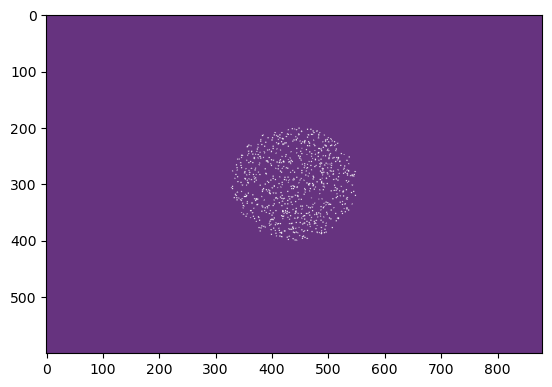

In [6]:
print(frames.shape)
plt.imshow(frames[300])

(pglImage:setRenderTarget) Setting render target to image 2 (880x600)
(pglImage:setRenderTarget) Resetting render target to screen.


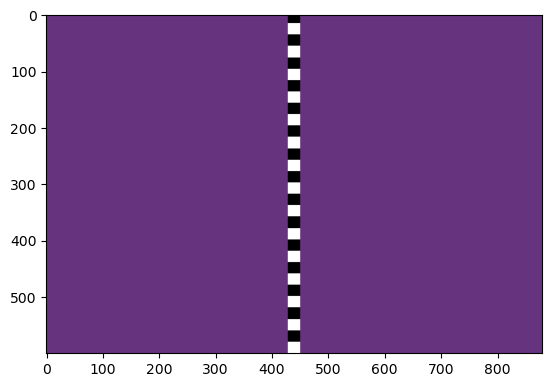

In [7]:
#pgl.verbose=1
pgl.frameGrabInit()
checkerboard = pgl.checkerboard(width=1)
checkerboard.display()
pgl.flush()

x = pgl.frameGrab()
plt.imshow(x)
pgl.frameGrabEnd()
#print(x[:,:,3])

In [ ]:
#checkerboard.display(stimulusPhase = 0)
#pgl.flush()
#checkerboard.temporalSquareWave = True
pgl.commandRecord()
checkerboard = pgl.checkerboard(x=-5,checkWidth=1, checkHeight=1,width=1,temporalFrequency=1)
for i in range(10*60): 
    checkerboard.display(stimulusPhase=0.5)
    pgl.flush()
pgl.commandRecordStop()
pgl.commandList()

In [ ]:
device = pglTrackPixx3(pgl)
#datapixx.getError()
device.dp.TPxSetLEDIntensity(8)
#print(device.dp.TPxGetLEDIntensity())
device.calibrateEyeImage()
#device.getCameraImage()
#Image.fromarray(device.getCameraImage()).show()

In [ ]:

#from pypixxlib.propixx import PROPixx
#pgl.verbose=1
#projector = pglProPixx()
#datapixx = pglDataPixx()

for i in range(1000):
    events = pgl.devicesPoll()
    #events = datapixx.poll()
    if events is not None:
        for event in events:
            print(event)
    pgl.waitSecs(0.1)
#datapixx.setupDigitalOutput()
#datapixx.test()
#for i in range(5):
#    print(f"Polling DataPixx: {i}")
    #datapixx.poll()
    #pgl.waitSecs(1)


#device.setRearProjection(True)
#from pypixxlib.propixx import PROPixx
#propixx = PROPixx()
#propixx.getDlpSequencerProgram()
#projector.status()
#print(device)
#from pgl.pglDevice import pglDevice, pglProPixx
#huh = pglDevice(pgl,'huh')
#duh = pglProPixx(pgl)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Load Helvetica (on macOS)
font_path = "/System/Library/Fonts/Helvetica.ttc"
font_size = 40
font = ImageFont.truetype(font_path, font_size)

# The text to render
text = "Hello World"
padding = 10  # Add some padding around text

# Create a dummy image to measure text size
dummy_img = Image.new("RGBA", (1, 1))
draw = ImageDraw.Draw(dummy_img)

# Get bounding box of the text
bbox = draw.textbbox((0, 0), text, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]

# Create an image with transparent background
img = Image.new("RGBA", (text_width + 2 * padding, text_height + 2 * padding), (0, 0, 0, 0))
draw = ImageDraw.Draw(img)

# Draw anti-aliased white text
draw.text((padding, padding), text, font=font, fill=(255, 255, 255, 255))

# Convert to NumPy array
bitmap = np.array(img)

# Debug: print shape and preview alpha channel
print("Bitmap shape:", bitmap.shape)
print("Alpha channel:")
print(bitmap[:, :, 3])



In [ ]:

#pgl.text("hello world",line=1,fontName = "Futura",fontSize=30,color=(0,0,0,1))
#pgl.text("This is the next line",x=0,line=-2)
pgl.text("And the next line of text, that I want to draw",x=0,line=-2)
pgl.text("next line")
pgl.text("wow")

pgl.flush()

In [ ]:
#pgl.line(0,0,1920,1080,(1,0,0),units="pix")
pgl.arc(0,0,innerRadius=0,outerRadius=10,color=(0,1,0,1))

#pgl.line(1920,0,0,1080,(0,0,1),units="pix")
pgl.flush()
#pgl.printCommandResults()

In [ ]:
pgl = pglLibrary()
pgl.open(0,880, 600)
#pgl.open()
pgl.visualAngle(57,40,30)


In [ ]:
#pgl.clearScreen((0.5, 0.5, 0.5))  # Clear the screen with a gray color
#pgl.verbose=1
pgl.clearScreen((0.5, 0.5, 0.5))  # Clear the screen with a gray color
grating = pgl.grating(spatialFrequency=0.1,phase=0, contrast=1,temporalFrequency=4.0,direction=-1)
#gabor = pgl.gabor(spatialFrequency=1,orientation=45,width=40,height=30,phase=0,contrast=0.8)
#gabor.print()


In [ ]:

pgl.profileModeClearAll()
pgl.profileMode = 2
#pgl.batchStart()
for i in range(360):
    grating.display()
    pgl.flush()
pgl.profileMode = 0
#pgl.flush()
#pgl.waitSecs(1)
#pgl.batchRun()
#pgl.waitSecs(2)
#pgl.batchEnd()
#pgl.waitSecs(2)

pgl.profileModeDisplay()

In [ ]:
#gabor.print()
gabor.display()
pgl.flush()



In [ ]:
pgl.profileModeClearAll()
#pgl.fullScreen(True)
_,_,frameRate,_ =pgl.getResolution()
print(frameRate)
pgl.profileMode = 2
#print(pgl.profileMode)
#print(pgl.profileModeBufferSize )
pgl.clearScreen([0,0,0])
pgl.flush()
for i in range(frameRate*1):
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    pgl.flush()
pgl.profileMode = 0
#pgl.fullScreen(False)
pgl.profileModeDisplay()


In [ ]:
_,_,frameRate,_ =pgl.getResolution()
pgl.profileModeClearAll()
pgl.batchStart()
for i in range(frameRate*5):
    #im.display()
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    #pgl.printCommandResults()


    pgl.flush()
    #pgl.printCommandResults()
#pgl.batchRun()
#pgl.batchEnd()

In [ ]:
pgl.batchRun()
pgl.batchEnd()
pgl.profileModeDisplay()

In [ ]:
imData = Image.open('/Users/justin/proj/pgl/testimage.jpg')
pgl.visualAngle(57,40,30)

In [ ]:
im = pgl.imageCreate(np.array(imData))
print(im).print()
#print(pgl.xPix2Deg)
#print(pgl.xDeg2Pix)
#print(np.array(imData))

In [ ]:
im = 0

In [ ]:
pgl.clearScreen(np.random.rand(3))
im.print()
im.display()
pgl.flush()

In [ ]:
pgl.clearScreen(np.random.rand(3))
pgl.flush()
pgl.close()

In [ ]:
#commandResults = pgl.profileModeCommandResults
#print(commandResults[0])
#commandResults = pgl.profileList[0].get('commandResults', 'None')
#print(commandResults['processedTime'])
#print(list(pgl.profileList[0].keys()))
pgl.flush()
pgl.printCommandResults()

In [ ]:
pgl.visualAngle(57,40,30)
print(pgl.screenWidth)
print(pgl.screenHeight)
#pgl.printCommandResults()
#print(pgl.xform)
pgl.clearScreen([0,0,0])
pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
pgl.printCommandResults()
pgl.flush()

In [ ]:
from pprint import pprint


pprint(pgl.gpuInfo)


In [ ]:
(screenWidth, screenHeight, refreshRate, bitDepth) = pglDisplayInfo.getResolution(1)
print(f"screenResolution: {screenWidth}x{screenHeight} refreshRate: {refreshRate} bitDepth: {bitDepth}")

pglDisplayInfo.setResolution(1, screenWidth, screenHeight, refreshRate, bitDepth)

Install pgl library

In [ ]:
pgl = pglLibrary()
pgl.getResolution(0)


Instal screen and task

In [ ]:
#init screen
s = pglScreen();
s.helloworld();

# init task
t = pglTask();
t.helloworld();


In [ ]:
# start MATLAB
import matlab.engine
eng = matlab.engine.start_matlab()

# add mgl to path
eng.addpath(eng.genpath("/Users/justin/proj/mgl"),nargout=0)


In [ ]:
# mgl from python using mgl engine test
eng.eval("mglOpen;",nargout=0)
eng.eval("mglVisualAngleCoordinates(57,[16,24]);",nargout=0)
eng.eval("mglClearScreen([0.3 0.7 0.2]);",nargout=0)
eng.eval("mglTextDraw('Hello World!',[0 0]);",nargout=0)
eng.eval("mglFlush;",nargout=0)
eng.eval("mglWaitSecs(3);",nargout=0)
eng.eval("mglClose;",nargout=0)



In [ ]:
pgl.clearScreen(np.random.rand(3))
pgl.flush()
pgl.clearScreen(np.random.rand(3))
pgl.flush()

In [ ]:
pgl.close()

In [ ]:
pgl.test()

In [3]:
pgl = pglLibrary()
#pgl.open(0,8,2)
pgl.open(0,880,600)
#pgl.open()
pgl.visualAngle(57,40,30)
datapixx = pglDataPixx()
pgl.devicesAdd(datapixx)

(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 15.6
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 3 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display)
(pgl:checkOS)   LED Cinema Display: 1920 x 1200 (WUXGA - Widescreen Ultra eXtended Graphics Array) (Unknown type)
(pglBase) Verbosity level set to 1
(pglBase) Main library instance created
(pglBase) Main library closed
(pglBase:open) Starting mglMetal application: /Users/justin/Library/Developer/Xcode/DerivedData/Build/Products/Debug/mglMetal.app
(pglBase:open) Using socket with address: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.Ow7FeEm3xQ
(pgl:_pglComm) .Connected to: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.Ow7FeEm3xQ
(pgl:_resolution:getResolution) Display 0/2: 1512x982 120Hz 32bits
(pglDataPixx) pypixxlib is 